In [1]:
import numpy as np
import pandas as pd
import scipy as sc
import sklearn
print (sklearn.__version__)
import matplotlib.pyplot as plt
import seaborn as sns


0.19.1


In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib 

In [19]:
data = pd.read_csv('C:\\Users\\emb-ashwcho\\Downloads\\driverdata.csv', sep=',')
data.head()

,latitutde,longitude,speed,behaviour,quality
0,6.73038,150.39692,23,average,2
1,57.67859,-163.16893,0,very_fast,4
2,-20.88434,-19.47666,2,slow,1
3,-51.07434,-57.43183,46,fast,3
4,-62.47534,91.74678,14,slow,1


In [24]:
data=data.drop("behaviour",axis=1)

In [25]:
data.head()

,latitutde,longitude,speed,quality
0,6.73038,150.39692,23,2
1,57.67859,-163.16893,0,4
2,-20.88434,-19.47666,2,1
3,-51.07434,-57.43183,46,3
4,-62.47534,91.74678,14,1


In [13]:
data.corr()

,latitutde,longitude,speed,quality
latitutde,1.000000,-0.079152,0.033820,0.063367
longitude,-0.079152,1.000000,0.036793,-0.008305
speed,0.033820,0.036793,1.000000,0.904142
quality,0.063367,-0.008305,0.904142,1.000000


Text(0.5,1,'Relationship between speed and quality')

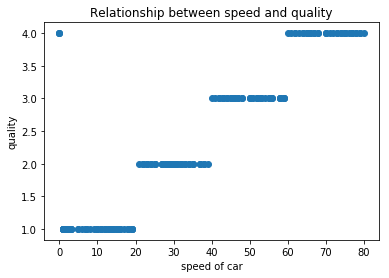

In [58]:
plt.scatter(data.speed, data.quality)
plt.xlabel("speed of car")
plt.ylabel("quality")
plt.title("Relationship between speed and quality")

In [52]:
# 4. Split data into training and test sets
y = data.quality
X = data.drop('quality', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.5, 
                                                    random_state=123, 
                                                    stratify=y)
 
# 5. Declare data preprocessing steps
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestRegressor(n_estimators=100))
 
# 6. Declare hyperparameters to tune
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}
 
# 7. Tune model using cross-validation pipeline
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
 
clf.fit(X_train, y_train)
 
# 8. Refit on the entire training set
# No additional code needed if clf.refit == True (default is True)
 
# 9. Evaluate model pipeline on test data
pred = clf.predict(X_test)
print (r2_score(y_test, pred))
print (mean_squared_error(y_test, pred))
print(clf2.predict(X_test))

0.9919565646364201
0.010149504950495054
[1.   2.   4.   3.   1.   1.   2.   2.   2.   4.   2.   1.   3.   2.
 3.   2.   1.   1.   2.   1.   2.   4.   4.   1.   1.   2.   1.   2.
 2.92 1.   2.   3.   1.   2.   3.   2.   1.   2.   3.   3.   1.   2.
 3.   1.   4.   2.   4.   3.   4.   2.25 1.   1.   1.   1.   4.   1.
 3.   1.   4.   3.   4.   2.   1.   3.   3.   1.   4.   2.   4.   2.
 2.   3.   4.   4.   2.   4.   4.   1.   2.   3.   3.   3.   3.   1.
 3.   1.   4.   3.99 3.99 4.   3.   3.   2.   4.   1.   1.   1.   2.
 1.   4.   2.  ]


In [53]:
# 10. Save model for future use
joblib.dump(clf, 'driverbehaviour.pkl')
clf2 = joblib.load('driverbehaviour.pkl')
clf2.predict(X_test) #topredict new data in future


array([1.  , 2.  , 4.  , 3.  , 1.  , 1.09, 2.  , 2.  , 2.  , 4.  , 2.  ,
       1.  , 3.  , 2.  , 3.  , 2.  , 1.  , 1.  , 2.  , 1.  , 2.  , 4.  ,
       4.  , 1.03, 1.01, 2.  , 1.  , 2.  , 2.77, 1.  , 1.98, 3.  , 1.  ,
       2.  , 3.  , 2.  , 1.  , 2.  , 3.  , 2.98, 1.02, 1.95, 3.  , 1.03,
       4.  , 1.95, 4.  , 3.  , 4.  , 2.03, 1.  , 1.  , 1.  , 1.  , 4.  ,
       1.06, 3.  , 1.03, 4.  , 3.  , 4.  , 2.  , 1.06, 3.  , 3.  , 1.  ,
       4.  , 2.  , 4.  , 1.98, 2.  , 3.  , 4.  , 4.  , 2.  , 4.  , 4.  ,
       1.  , 1.95, 3.  , 3.  , 3.  , 3.  , 1.  , 3.  , 1.  , 4.  , 4.  ,
       4.  , 4.  , 3.  , 3.  , 2.  , 4.  , 1.  , 1.01, 1.02, 2.  , 1.06,
       4.  , 2.  ])

In [61]:
y_test

126    1
71     2
119    4
33     3
158    1
31     1
101    2
200    2
61     2
18     4
148    2
150    1
53     3
168    2
172    3
171    2
149    1
67     1
68     2
57     1
91     2
111    4
55     4
47     1
199    1
27     2
128    1
104    2
135    3
144    1
      ..
122    3
127    4
23     4
24     2
186    4
198    4
188    1
58     2
17     3
65     3
179    3
88     3
191    1
117    3
103    1
196    4
187    4
159    4
115    4
182    3
170    3
5      2
78     4
50     1
89     1
79     1
10     2
8      1
19     4
92     2
Name: quality, Length: 101, dtype: int64

In [62]:
y_train

165    4
2      1
197    2
45     1
133    2
38     1
44     3
84     2
98     1
190    1
13     4
94     4
25     1
29     2
120    2
63     4
72     3
22     4
36     3
151    3
113    2
137    3
184    3
30     3
123    4
1      4
166    1
76     4
96     4
93     3
      ..
81     1
15     2
95     2
86     3
130    1
193    3
145    3
75     4
66     1
174    4
177    2
90     4
46     3
26     1
141    1
132    2
129    2
0      2
11     3
20     1
136    4
180    2
178    1
99     1
105    3
183    1
153    4
74     1
59     3
54     2
Name: quality, Length: 100, dtype: int64

In [60]:
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = pred
confusion_matrix(y_true, y_pred)


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

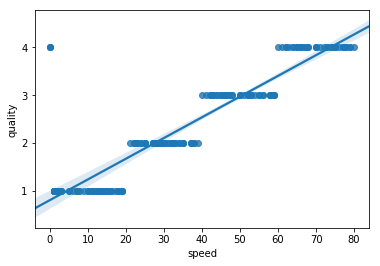

In [14]:
sns.regplot(y="quality", x="speed", data=data, fit_reg = True)


In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
m = ols('quality ~ speed',data).fit()
print (m.summary())

C:\Users\emb-ashwcho\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     891.3
Date:                Thu, 05 Apr 2018   Prob (F-statistic):           1.98e-75
Time:                        13:53:49   Log-Likelihood:                -137.40
No. Observations:                 201   AIC:                             278.8
Df Residuals:                     199   BIC:                             285.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8028      0.063     12.821      0.0

Text(0.5,1,'quality vs Predicted quality: $Y_i$ vs $\\hat{Y}_i$')

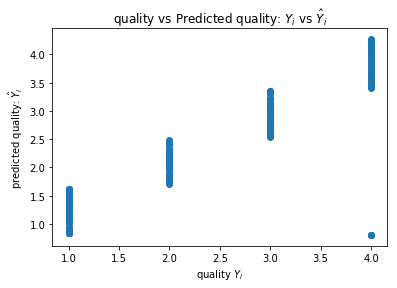

In [31]:
plt.scatter(data['quality'], m.fittedvalues)
plt.xlabel("quality $Y_i$")
plt.ylabel("predicted quality: $\hat{Y}_i$")
plt.title("quality vs Predicted quality: $Y_i$ vs $\hat{Y}_i$")

In [ ]:
speed_list=data.speed
type(speed_list)  
speedlist=speed_list.tolist
type(speedlist)
        
        
        


In [18]:
my_list = data["speed"].values
my_list
import csv
columns = 1
rows = 200
with open("random_num.csv", "wb") as outfile:
    writer = csv.writer(outfile)
for i in my_list:
            if (i>0 and i<20):
                print ("slow")
            elif (i>19 and i<40):
                print("average")
            elif (i>39 and i<60):
                print("fast")
            else:
                print("very_fast")





            

average
very_fast
slow
fast
slow
average
average
slow
slow
fast
average
fast
slow
very_fast
fast
average
slow
fast
very_fast
very_fast
slow
average
very_fast
very_fast
average
slow
slow
average
very_fast
average
fast
slow
slow
fast
average
fast
fast
very_fast
slow
average
average
very_fast
slow
average
fast
slow
fast
slow
fast
fast
slow
very_fast
very_fast
fast
average
very_fast
very_fast
slow
average
fast
average
average
slow
very_fast
very_fast
fast
slow
slow
average
slow
slow
average
fast
slow
slow
very_fast
very_fast
slow
very_fast
slow
very_fast
slow
slow
slow
average
fast
fast
average
fast
slow
very_fast
average
average
fast
very_fast
average
very_fast
average
slow
slow
average
average
fast
slow
average
fast
fast
very_fast
fast
fast
slow
very_fast
average
average
slow
very_fast
fast
fast
fast
very_fast
average
average
fast
very_fast
average
average
slow
very_fast
slow
average
slow
very_fast
average
average
slow
fast
very_fast
fast
very_fast
slow
average
slow
slow
fast
slow
fast
a

In [32]:
for i in my_list:
            if (i>0 and i<20):
                print (1)
            elif (i>19 and i<40):
                print(2)
            elif (i>39 and i<60):
                print(3)
            else:
                print(4)


2
4
1
3
1
2
2
1
1
3
2
3
1
4
3
2
1
3
4
4
1
2
4
4
2
1
1
2
4
2
3
1
1
3
2
3
3
4
1
2
2
4
1
2
3
1
3
1
3
3
1
4
4
3
2
4
4
1
2
3
2
2
1
4
4
3
1
1
2
1
1
2
3
1
1
4
4
1
4
1
4
1
1
1
2
3
3
2
3
1
4
2
2
3
4
2
4
2
1
1
2
2
3
1
2
3
3
4
3
3
1
4
2
2
1
4
3
3
3
4
2
2
3
4
2
2
1
4
1
2
1
4
2
2
1
3
4
3
4
1
2
1
1
3
1
3
2
1
2
1
1
3
4
4
3
1
3
4
1
4
3
1
2
1
1
4
1
4
2
2
3
2
3
2
4
1
2
2
1
3
2
2
3
1
3
3
4
4
1
2
1
1
3
3
4
4
4
2
4
1
2
